# TITANIC

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/titanic.png" width="800">

In [2]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv

In [4]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv'

In [5]:
df = pd.read_csv(path, sep='\t')
#df = pd.read_csv(path,)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:

- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


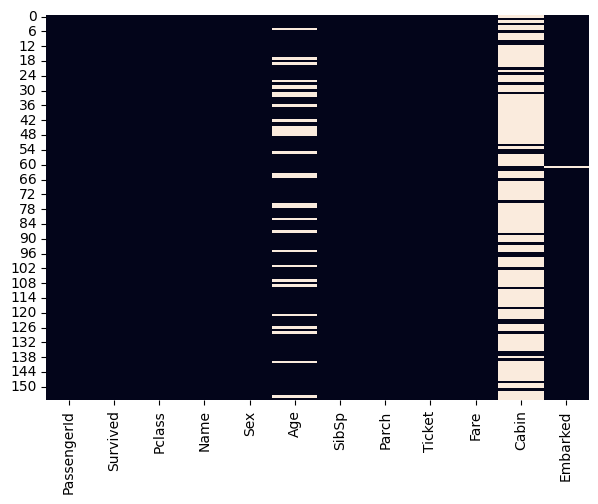

In [7]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull(),cbar=False);

In [8]:
# Bilanciamento della target
df['Survived'].value_counts()

,count
Survived,
0,102
1,54


In [9]:
df['Ticket'].value_counts()

,count
Ticket,
113803,2
347082,2
349909,2
237736,2
S.O.C. 14879,2
...,...
113776,1
A.5. 11206,1
A/5. 851,1


In [10]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
df = df.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
151,1,1,female,22.0,1,0,66.6000,S
152,0,3,male,55.5,0,0,8.0500,S
153,0,3,male,40.5,0,2,14.5000,S
154,0,3,male,NaN,0,0,7.3125,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  156 non-null    int64  
 1   Pclass    156 non-null    int64  
 2   Sex       156 non-null    object 
 3   Age       126 non-null    float64
 4   SibSp     156 non-null    int64  
 5   Parch     156 non-null    int64  
 6   Fare      156 non-null    float64
 7   Embarked  155 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 9.9+ KB


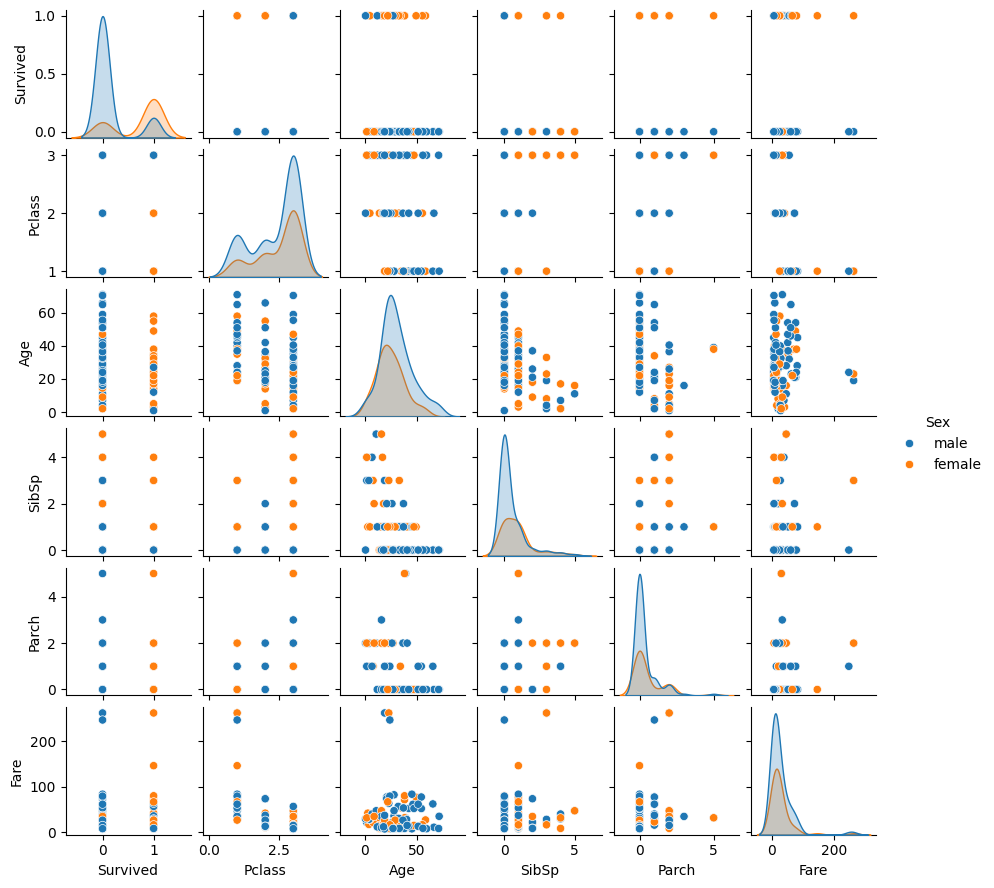

In [12]:
sns.pairplot(df,hue='Sex',height=1.5)

In [13]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,30
SibSp,0
Parch,0
Fare,0
Embarked,1


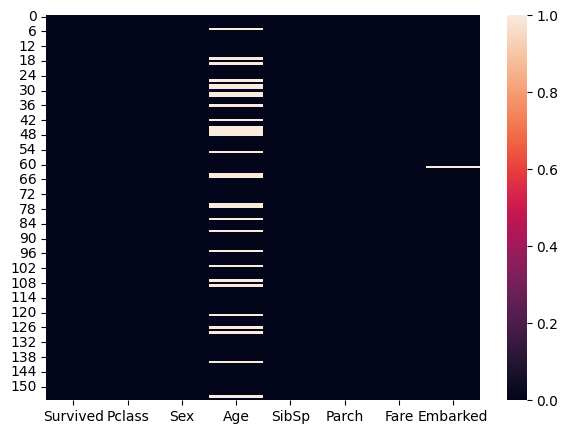

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull());

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/holes.jpg" width="600">

Interpolate for missing values

This means you can deduce the missing values by interpolating  existing values.

For example, if we have the series 1, 3, 4, ?, 6, 8,….What is the missing value

Simply put, it is midpoint between 4 and 6. So the result it (4+6)/2 = 5

To interpolate missing values for Age, use the code below

In [15]:
# To replace missing values with interpolated values, for example Age
df['Age'] = df['Age'].interpolate()

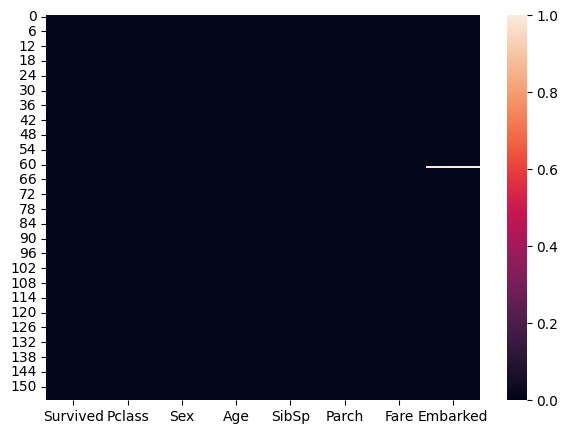

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(df.isnull());

In [17]:
df['Embarked'].value_counts()

,count
Embarked,
S,110
C,32
Q,13


In [18]:
# Drop all rows with missin data solo 1 riga
df = df.dropna()

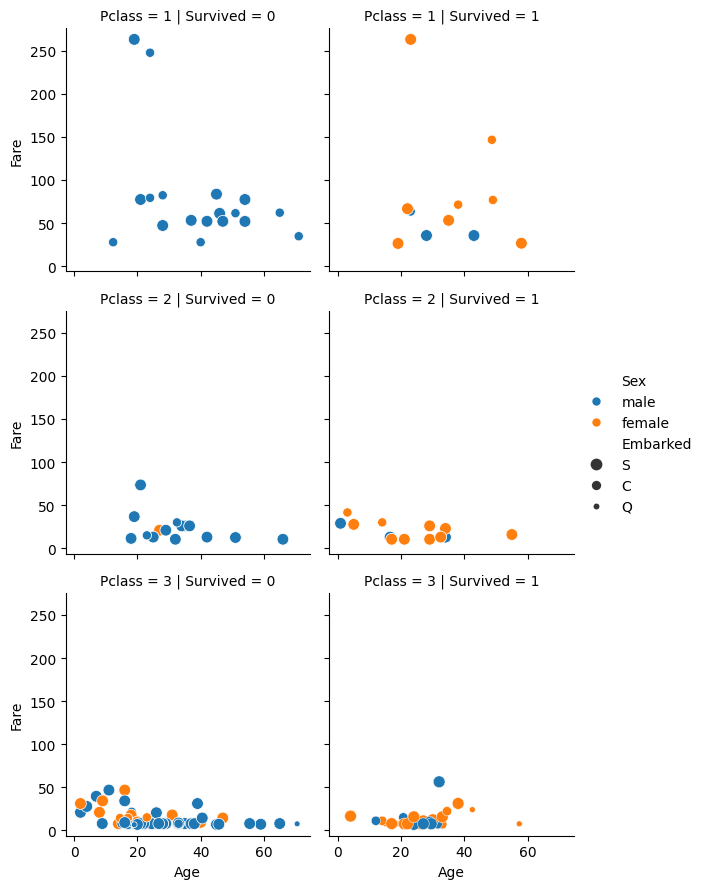

In [19]:
sns.relplot(x="Age", y="Fare", hue="Sex",
                col="Survived", row="Pclass", size='Embarked',data=df,height=3,)

### Convert categorical values to numeric

Now if you view the dataset properties using df.info(), you will see that the Sex and Embarked columns are not numeric. We we now convert them to numeric. There is a separate tutorial on Converting categorical column to numeric here.

This takes three steps:

First create dummy variables from the categorical columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 155
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  155 non-null    int64  
 1   Pclass    155 non-null    int64  
 2   Sex       155 non-null    object 
 3   Age       155 non-null    float64
 4   SibSp     155 non-null    int64  
 5   Parch     155 non-null    int64  
 6   Fare      155 non-null    float64
 7   Embarked  155 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 10.9+ KB


In [21]:
!pip install jupyter-summarytools -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.2 MB/s eta 0:00:00


In [22]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Survived[int64],1. 02. 1,102 (65.8%)53 (34.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATpJREFUeJzt2zFqw0AURdGvIEzczCAEWowWkcVmEbMbITRFbNxMChfBpDVvnJd7VvCNLwIbvaG1FoDCEBHniDj1PgS/3Fprl95HPNM4z/NHSmnqfQge1Vr3YRg+nYIbU0rTuq6XnPO19zG4O47jvZQybdt2igif2CIics7XZVm+eh+DB+feBzzbW+8D8H8QG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggM0bcX9brfQh+uH4fY611L6VMYfiy3l9Wa90j4tb7jmdi8PK67AYvA1M+qLg+2eyeCg4sp3yOMzgHdlM+1xmcA9cpH7+sXxB/6kKG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGbspn9NncWM55XOcwTlg8AKZbwpbat9G/K3sAAAAAElFTkSuQmCC"">",0(0.0%)
2,Pclass[int64],1. 32. 23. 1,96 (61.9%)30 (19.4%)29 (18.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAYtJREFUeJzt20Fqg3AQRvGxSGg2iggeJofoYXsIbyPif9GEbOzCO7wpnfc7wRBeEgz5uvM8QyJ8ZB+gOrqIuEfELfuQwt7neT6zjyD08zx/DcMwZR9SVWtt77ruu0Jw/TAM0+PxeI7j+Mo+pprjOD7XdZ22bbtFxP+PLSJiHMfXsiw/2ccUdc8+gOIDgjDGJoyxCWNswhibMMYmjLEJY2zCGJswxiaMsQljbMIYmzDGJkwfcf2vKvuQiqq97n1rbV/XdYpC/6v6S1pre0S8s+8guEHIV2aD0DnlEyXzk63MO1qXtHVVpVWRLinrqmqrIl0y11U+/Rbjj7rCGJswxiaMsQljbMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJswKeuqaqsiXdLWVZVWRbq4QRDGdZUwPiAIk/U16ldoQSlTPmd8NeFTPmd8dWVN+ZzxFeQDgjDGJoyxCWNswhibMMYmjLEJY2zCGJswxiaMsQljbMIYmzDGJgw+5XPGV1fKlM8ZX01uEIRxyifML0q8o0qeya8zAAAAAElFTkSuQmCC"">",0(0.0%)
3,Sex[object],1. male2. female,100 (64.5%)55 (35.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATlJREFUeJzt28Fpw0AURdE3QZhko0EIVIyKSLEpQt0IoVnExpvJwpAO/MbzfU8F3/hibKOXaq0CHJKkL0mX1ofg373Wem19xDMM8zx/j+M4tT4ED6WUI6X0EzG4YRzHaV3Xa8751vqYd3ee5+e2bdO+7xdJ8WKTpJzzbVmW39bHQNLja01IH60PwPsgNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDbHBZpAeD+21PgTx34ehlHJs2zYp8EN7PSmlHJLure94BgYvryfs4CUx5YNL9E+2sJ8SPQo95Ys8i+tR2Clf9Flcj6JP+fiF/UL4Uxc2xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22ISd8kV8Tb0LPeWLPIvrEYMX2PwBCltq38NzG/wAAAAASUVORK5CYII="">",0(0.0%)
4,Age[float64],Mean (sd) : 28.2 (14.4)min < med < max:0.8 < 26.0 < 71.0IQR (CV) : 16.0 (2.0),77 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAslJREFUeJzt3U2O2jAYgOHPZYDwI0cICXZcoFIXLHOIOWyPMAtOwA3YISEEggERAt2USlUZILZT8oX32Rui0TueseMo5nw+C1B23559AcAj3p59AbcYY1oi0nAcfjifz7uQ14PnKW2oxphWv99/t9b2XMav1+ulMeYnsVZDaUMVkYa1tpckyS6O432egavVKppMJr3FYtEQEUKtgDKHKiIicRzvB4PBp8PQVvCLwdOwmIIKhAoVSv+n31WWZXURscYY149g16BEKhnqdrutp2n6YzQa1Wq1Wq6F2AW7BuVSyVAPh8NbFEXt8Xi8Hw6Hy7zj2TUon0qGetHpdFx3DETYNSgVFlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQoVK3+v34XlMkCOCgRHqFb7HBDkiGB6hXuFzTJAjgsUg1Bs8jglyRDAwFlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFnpkqAI9ah0eogfGodTEINTAetS4GoRaER63DYjEFFQqdUY0xLRFpOA63p9OpHvJ6NODVmNcVFqoxptXv99+ttT2X8WmaRlmWfd/v9x8i4vpSM1V4NebX7obqMSvabrc7SJJkHcdx7h/6bDbrTafT9vF4rDl8t0q8GvNrN0P1mRUvM2Kz2fxwWVQsl8uXXVTwasx/3ZtRG9baXpIku7yz4ivOiCjOQ/+jxnGc+zf8lWdEhMf2FFRgw79iqnrOgFArpMrnDAi1Qp59zsDzBs/N2ZxQK+gZ5wx8b/Dcm80JFaE4b2U+MpsTKoJy2cr87eZsTqj4w3PHoNBDRIQKEfHfMSj6EBGhQkT8D8QUfcucUPEX1x2Dom+ZcwsVKjw0o65WqyjvB282m0hEZLvdRvP5vP0/x2v9bq3X7Tv+kb5+AaWivrCeuQk9AAAAAElFTkSuQmCC"">",0(0.0%)
5,SibSp[int64],1. 02. 13. 34. 25. 46. 5,97 (62.6%)40 (25.8%)6 (3.9%)6 (3.9%)4 (2.6%)2 (1.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAq5JREFUeJzt28FNG1EYhdHflkXizVgWEmVQAEWk2BThAtwHsphFTNg4i0RREI

italicised text### Transform Categorical Features

In [23]:
df =  pd.get_dummies(df, columns=['Embarked','Sex'],dtype=int, drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.00,1,0,7.2500,0,1,1
1,1,1,38.00,1,0,71.2833,0,0,0
2,1,3,26.00,0,0,7.9250,0,1,0
3,1,1,35.00,1,0,53.1000,0,1,0
4,0,3,35.00,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
151,1,1,22.00,1,0,66.6000,0,1,0
152,0,3,55.50,0,0,8.0500,0,1,1
153,0,3,40.50,0,2,14.5000,0,1,1
154,0,3,45.75,0,0,7.3125,0,1,1


### Separate the Features and the Classes

We would separate the features (X) and the classes (y). The classes is the target variable we want to predict. In this case, it is the ‘Survived’ column

In [24]:
## Move target variable to the end of the dataframe
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

In [25]:
df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Sex_male','Survived']]

In [26]:
X_ = df.iloc[:,0:-1] #dati non normalizzati
y = df.iloc[:,-1]

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
standardized_data = sc.fit_transform(X_)

X = standardized_data

In [28]:
X

array([[ 0.72126302, -0.43309291,  0.36077699, ..., -0.30257114,
         0.63960215,  0.74161985],
       [-1.81954989,  0.67974892,  0.36077699, ..., -0.30257114,
        -1.56347192, -1.34839972],
       [ 0.72126302, -0.15488245, -0.58702697, ..., -0.30257114,
         0.63960215, -1.34839972],
       ...,
       [ 0.72126302,  0.85363045, -0.58702697, ..., -0.30257114,
         0.63960215,  0.74161985],
       [ 0.72126302,  1.21878168, -0.58702697, ..., -0.30257114,
         0.63960215,  0.74161985],
       [-1.81954989,  1.58393291, -0.58702697, ..., -0.30257114,
        -1.56347192,  0.74161985]])

In [29]:
y.shape

(155,)

In [30]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    stratify=y
                                                    )

In [31]:
X_test.shape

(47, 8)

## Build Logistic Regression Classifier

In [32]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

0.7872340425531915

In [34]:
y_pred = lr_clf.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[26,  5],
       [ 5, 11]])

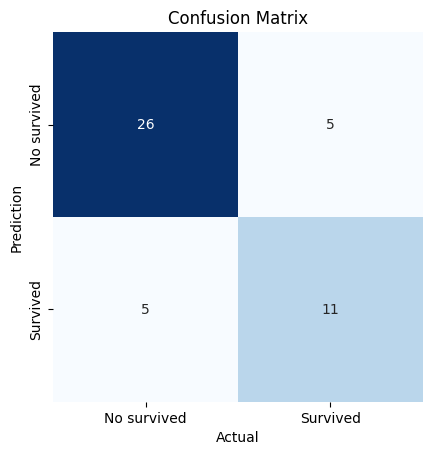

In [36]:
from sklearn.metrics import confusion_matrix

#labels = y_test.sort_values().drop_duplicates().to_list()
labels = ['No survived','Survived']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , square=True, annot=True, cbar=False,cmap='Blues',xticklabels=labels,yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction');

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.69      0.69      0.69        16

    accuracy                           0.79        47
   macro avg       0.76      0.76      0.76        47
weighted avg       0.79      0.79      0.79        47



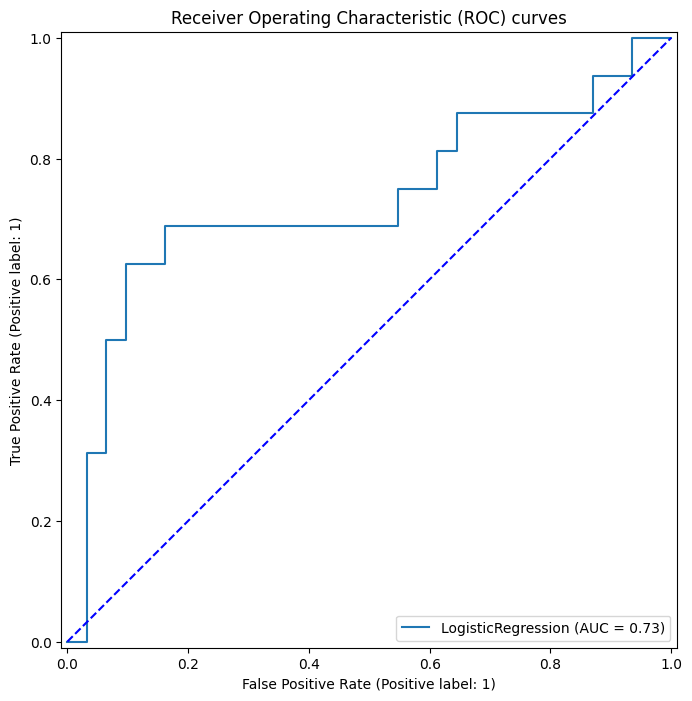

In [38]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8,8))
ax = plt.gca()

RocCurveDisplay.from_estimator(lr_clf, X_test, y_test,ax=ax)
plt.plot([0,1],[0,1],'--b')

plt.title("Receiver Operating Characteristic (ROC) curves")
plt.legend(loc=4);